<a href="https://colab.research.google.com/github/uzeziogho/MLDM/blob/Classification/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pylab import *

In [ ]:
import seaborn as sns

from collections import Counter

In [ ]:
class1= pd.read_csv('/content/Maternal Health Risk Data Set.csv')
class1.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
kf=class1.copy()
class1.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7463b10410>,
      dtype=object)

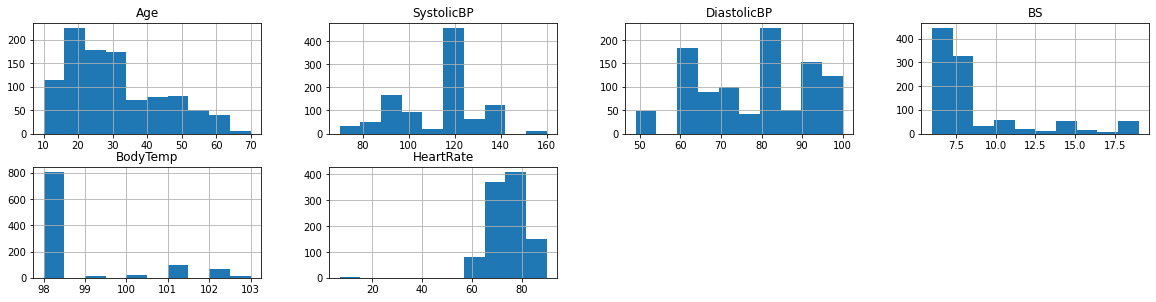

In [ ]:
class1.hist(layout=(4,4), figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


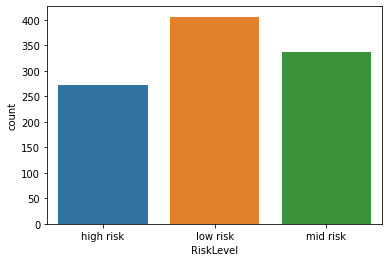

In [ ]:
sns.countplot(class1['RiskLevel'])

In [ ]:
class1['RiskLevel'].unique

<bound method Series.unique of 0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object>

In [ ]:
class1.corr(method='pearson')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [ ]:
X = class1[['Age','SystolicBP','DiastolicBP','BodyTemp','BS','HeartRate']]
y_Risk = class1[['RiskLevel']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


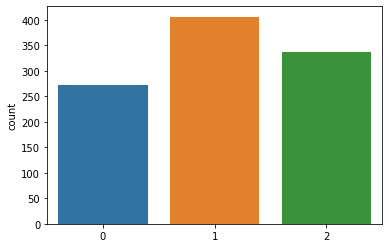

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y = labelencoder.fit_transform(y_Risk.values.ravel())
sns.countplot(y)

In [ ]:
print(y_train.shape)
print(X_train.shape)

(811,)
(811, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
# 1 Algorithm: Logistic Regression
lr = LogisticRegression(solver='newton-cg', class_weight={0:1.229,1:0.845,2:1.04})
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(y_test)
print(pred_lr)
print(metrics.accuracy_score(y_test, pred_lr)*100)
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

[2 0 0 1 1 2 2 0 2 2 0 2 1 0 2 2 0 0 1 2 2 2 1 0 1 2 0 1 1 1 1 0 1 2 1 0 0
 1 1 0 0 1 0 0 1 2 0 2 1 1 2 1 1 2 1 2 0 1 1 2 1 2 2 1 1 1 2 1 1 0 0 0 1 2
 2 2 1 0 0 2 1 2 1 1 2 1 1 2 0 2 2 0 1 0 1 2 2 1 0 2 1 2 1 2 2 2 1 1 1 2 2
 1 1 0 0 1 1 0 1 0 0 2 1 2 0 0 2 2 2 1 1 1 2 2 1 1 0 2 2 2 2 2 0 0 1 1 0 1
 1 2 1 1 1 2 0 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 1 2 1 1 0 2 1 1 2 0 2 1 0 0
 2 0 2 1 1 2 2 2 2 2 0 2 0 1 2 2 2 0]
[2 0 0 1 0 0 2 0 2 2 0 1 2 2 2 1 0 1 1 2 1 0 1 0 1 2 0 1 1 1 2 0 1 1 2 0 0
 1 1 0 0 0 0 2 1 1 0 2 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 2 2 0 2 2
 2 0 1 0 0 2 1 1 1 1 1 1 2 0 0 1 0 0 1 0 1 1 2 1 0 1 1 0 2 1 1 1 1 0 1 2 0
 2 1 0 0 1 1 0 1 0 0 1 1 1 2 0 1 1 1 1 1 1 2 2 2 1 0 1 1 2 0 0 0 0 1 1 0 1
 1 1 1 1 1 2 0 2 1 1 1 0 1 1 1 2 1 2 0 1 1 2 0 2 1 1 1 0 2 1 1 2 0 1 1 0 0
 1 0 1 1 2 2 1 0 1 1 1 1 0 1 1 1 1 0]
63.05418719211823
[[40  2  5]
 [ 4 65 11]
 [16 37 23]]
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        47
          

In [ ]:
#2 Algorithm: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(y_test)
print(pred_knn)
cm=metrics.confusion_matrix(y_test,pred_knn)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, pred_knn)*100)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[2 0 0 1 1 2 2 0 2 2 0 2 1 0 2 2 0 0 1 2 2 2 1 0 1 2 0 1 1 1 1 0 1 2 1 0 0
 1 1 0 0 1 0 0 1 2 0 2 1 1 2 1 1 2 1 2 0 1 1 2 1 2 2 1 1 1 2 1 1 0 0 0 1 2
 2 2 1 0 0 2 1 2 1 1 2 1 1 2 0 2 2 0 1 0 1 2 2 1 0 2 1 2 1 2 2 2 1 1 1 2 2
 1 1 0 0 1 1 0 1 0 0 2 1 2 0 0 2 2 2 1 1 1 2 2 1 1 0 2 2 2 2 2 0 0 1 1 0 1
 1 2 1 1 1 2 0 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 1 2 1 1 0 2 1 1 2 0 2 1 0 0
 2 0 2 1 1 2 2 2 2 2 0 2 0 1 2 2 2 0]
[2 0 0 2 0 2 0 2 2 0 0 1 1 1 2 1 0 1 1 2 1 2 2 2 1 2 0 2 1 1 0 0 1 1 1 0 0
 2 1 0 0 2 2 0 1 2 0 2 1 1 1 1 2 1 1 2 0 1 1 2 1 1 1 2 2 0 2 0 1 0 0 0 0 2
 2 0 1 2 0 1 1 1 1 1 1 1 1 2 0 1 1 0 1 0 1 1 2 1 0 1 1 2 1 1 1 2 1 2 1 2 2
 2 1 0 0 1 1 0 1 0 2 1 1 1 1 0 1 1 2 1 1 1 2 1 1 1 0 1 1 2 0 1 0 0 1 1 0 2
 2 1 1 1 1 2 0 2 1 2 1 0 1 1 2 2 1 2 0 1 1 1 2 2 1 2 1 0 2 1 1 1 0 1 2 0 0
 1 0 1 1 1 2 1 0 2 1 1 2 0 1 2 2 1 0]
65.02463054187191
[[38  4  5]
 [ 5 59 16]
 [ 7 34 35]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        47
          

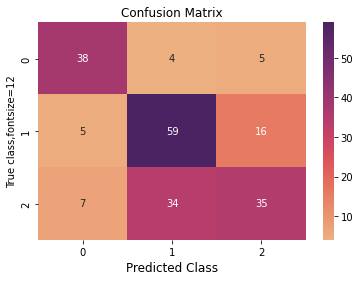

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
#3 Algorithm: Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion = 'entropy',random_state=42)
classifier.fit(X_train,y_train)

#predicting the test set results
y_pred=classifier.predict(X_test)
print(y_pred)
print(y_test)

[2 0 0 1 1 2 2 2 2 1 0 2 2 0 2 2 0 1 1 2 2 2 0 0 1 2 0 2 1 1 2 0 1 2 1 0 0
 2 1 0 0 1 0 0 1 2 0 2 1 1 2 1 1 2 2 2 0 1 1 2 1 2 2 2 1 0 2 0 2 0 0 0 2 2
 2 0 1 2 0 2 1 2 1 1 2 1 1 2 0 2 2 0 1 0 2 1 2 1 0 2 1 2 1 1 2 2 1 2 1 2 2
 2 1 0 2 1 1 0 2 0 2 1 1 2 0 0 2 2 2 2 1 1 2 2 1 2 0 2 1 2 0 2 0 0 1 1 0 1
 1 2 1 2 1 2 0 2 1 2 1 2 1 1 1 2 1 2 2 2 1 1 0 1 2 1 2 0 2 1 1 1 0 2 1 2 0
 1 0 1 2 1 2 2 2 2 1 1 2 0 1 2 2 2 0]
[2 0 0 1 1 2 2 0 2 2 0 2 1 0 2 2 0 0 1 2 2 2 1 0 1 2 0 1 1 1 1 0 1 2 1 0 0
 1 1 0 0 1 0 0 1 2 0 2 1 1 2 1 1 2 1 2 0 1 1 2 1 2 2 1 1 1 2 1 1 0 0 0 1 2
 2 2 1 0 0 2 1 2 1 1 2 1 1 2 0 2 2 0 1 0 1 2 2 1 0 2 1 2 1 2 2 2 1 1 1 2 2
 1 1 0 0 1 1 0 1 0 0 2 1 2 0 0 2 2 2 1 1 1 2 2 1 1 0 2 2 2 2 2 0 0 1 1 0 1
 1 2 1 1 1 2 0 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 2 1 2 1 1 0 2 1 1 2 0 2 1 0 0
 2 0 2 1 1 2 2 2 2 2 0 2 0 1 2 2 2 0]


In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
#print('accuracy:%.2f\n\n'%(acc))
print(metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

80.29556650246306
[[40  2  5]
 [ 3 59 18]
 [ 3  9 64]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.84      0.74      0.79        80
           2       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print(result)

accuracy:0.80


Confusion Matrix:
[[40  2  5]
 [ 3 59 18]
 [ 3  9 64]] 


----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.84      0.74      0.79        80
           2       0.74      0.84      0.79        76

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



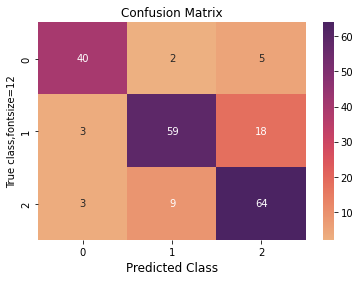

In [ ]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=99)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(6, ), activation='relu'))
#model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 56        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [ ]:
0:1.229,1:0.845,2:1.04

SyntaxError: ignored

In [ ]:
class_weights={0:1.229,1:0.845,2:1.04}
history=model.fit(X_train,y_train,batch_size=8,epochs=50,class_weight=class_weights,verbose=2,validation_split=0.2)

Epoch 1/50
81/81 - 1s - loss: 0.5865 - accuracy: 0.3549 - val_loss: 0.3606 - val_accuracy: 0.3865 - 905ms/epoch - 11ms/step
Epoch 2/50
81/81 - 0s - loss: 0.3105 - accuracy: 0.4537 - val_loss: 0.1026 - val_accuracy: 0.4294 - 183ms/epoch - 2ms/step
Epoch 3/50
81/81 - 0s - loss: 0.1065 - accuracy: 0.4985 - val_loss: -1.0123e-01 - val_accuracy: 0.4663 - 216ms/epoch - 3ms/step
Epoch 4/50
81/81 - 0s - loss: -6.3381e-02 - accuracy: 0.5231 - val_loss: -2.6733e-01 - val_accuracy: 0.5031 - 219ms/epoch - 3ms/step
Epoch 5/50
81/81 - 0s - loss: -2.1522e-01 - accuracy: 0.5231 - val_loss: -4.4127e-01 - val_accuracy: 0.5153 - 233ms/epoch - 3ms/step
Epoch 6/50
81/81 - 0s - loss: -3.5960e-01 - accuracy: 0.5278 - val_loss: -6.0159e-01 - val_accuracy: 0.5092 - 212ms/epoch - 3ms/step
Epoch 7/50
81/81 - 0s - loss: -5.0212e-01 - accuracy: 0.5247 - val_loss: -7.6943e-01 - val_accuracy: 0.5031 - 174ms/epoch - 2ms/step
Epoch 8/50
81/81 - 0s - loss: -6.4903e-01 - accuracy: 0.5247 - val_loss: -9.2788e-01 - val_ac

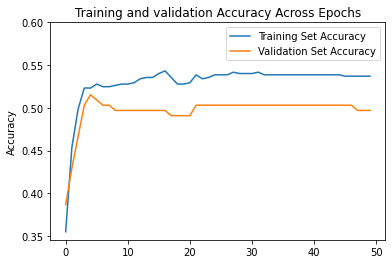

In [ ]:
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']

plt.plot(accuracy,label='Training Set Accuracy')
plt.plot(validation_accuracy,label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.6])
plt.title('Training and validation Accuracy Across Epochs')
plt.legend()

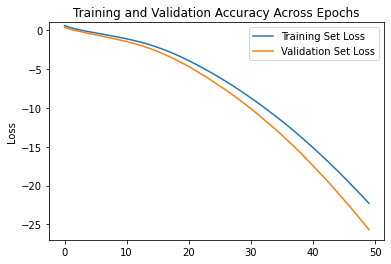

In [ ]:
loss=history.history['loss']
validation_loss=history.history['val_loss']

plt.plot(loss,label='Training Set Loss')
plt.plot(validation_loss,label='Validation Set Loss')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [ ]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

7/7 [==============================] - 0s 2ms/step


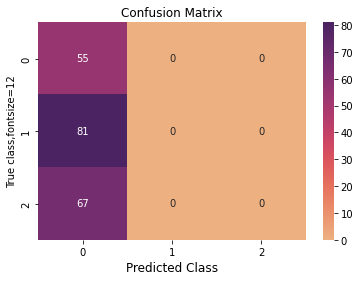

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)

ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True class,fontsize=12")
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      1.00      0.43        55
           1       0.00      0.00      0.00        81
           2       0.00      0.00      0.00        67

    accuracy                           0.27       203
   macro avg       0.09      0.33      0.14       203
weighted avg       0.07      0.27      0.12       203



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
